load original data

In [1]:
# load data
import pandas as pd
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
windows_filepath = 'D:/Dropbox/Machine Learning/Data/Ouyang/20200708/labelDataOffset.csv'
mac_filepath = '/Users/jiahuali1991/Dropbox/Machine Learning/Data/Ouyang/20200708/labelDataOffset.csv'
df = pd.read_csv(windows_filepath,header=None)
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 09:18:24
--- 42.099974393844604 seconds ---
End Time = 09:19:06


Fourier Transformation 

In [2]:
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)

# concatenate alternating columns with pandas
df1 = df.iloc[:,:256]
df1
df2 = df.iloc[:,256:512]
df2

df_new = pd.DataFrame()
for i in range(len(df2.columns)):
    df_new[df1.columns[i]]=df1[df1.columns[i]]
    df_new[df2.columns[i]]=df2[df2.columns[i]]

df_new
df_new.shape


# make X to complex numpy array
import numpy as np
X_reshape = np.array(df_new).reshape(464780,1,256,2)
complex_df = np.apply_along_axis(lambda args: [complex(*args)], 3, X_reshape)
complex_df_reshape = complex_df.reshape(464780,256)

# Fast Fourier Transformation
from scipy.fftpack import fft
ft_df = fft(complex_df_reshape)
ft_real = pd.DataFrame(ft_df.real)
ft_imag = pd.DataFrame(ft_df.imag)
X_full = pd.concat([ft_real, ft_imag],axis=1)

X_full
X_full.to_csv('D:/Dropbox/Machine Learning/Data/Ouyang/20200708/labelDataOffset_fft.csv', index=False)

print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 21:46:15
--- 978.1732649803162 seconds ---
End Time = 22:02:34


Load Fourier Transformed Data

In [2]:
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)

# load fft transformed data
import pandas as pd
windows_filepath_fft = 'D:/Dropbox/Machine Learning/Data/Ouyang/20200708/labelDataOffset_fft.csv'
df_fft = pd.read_csv(windows_filepath_fft,header=0)

print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 09:19:06
--- 59.33441686630249 seconds ---
End Time = 09:20:05


In [3]:
# Original Data
X = df.iloc[:,:512]
y = df[512]
#print(X.describe())
# print(X.shape)

# get unique value for the label
import numpy as np
#np.unique(y)
#print(y.describe())

# FFT
# split features (X) and lables (y)
X_fft = df_fft
#print(X_fft.describe())
#print(X_fft.shape)

Standardize the Data and Split data into training and testing sets

In [4]:
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)

# standardize the data as z-scores
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype('float64'))
X_fft_scaled = scaler.fit_transform(X_fft.astype('float64'))

# split training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
X_fft_train, X_fft_test, y_train, y_test = train_test_split(X_fft_scaled, y, test_size=0.33, random_state=42)
y_train = y_train - 1
y_test = y_test -1

print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 09:20:06
--- 25.468076467514038 seconds ---
End Time = 09:20:32


deep learning

Start Time = 09:21:07


C:\Users\jiahu_000\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jiahu_000\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jiahu_000\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jiahu_000\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
____

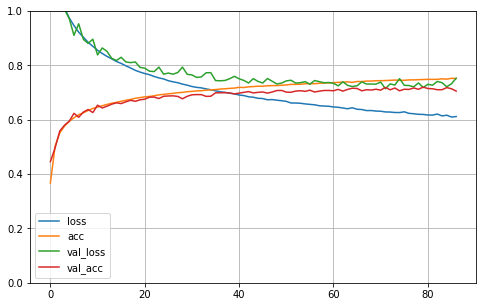

--- 1125.6818130016327 seconds ---
End Time = 09:39:53


In [6]:
# deep learning on original data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)

import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[512]))
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

print(model.summary())

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]) # sgd

filepath = 'D:/Dropbox/Machine Learning/Data/Ouyang/20200708/DeepNet_Model_labelDataOffset_original.h5'
# model.load_weights(filepath) #load previously trained model


history = model.fit(X_train, y_train, epochs=500, batch_size = 128,
                    validation_data=(X_test, y_test),
                   callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='auto')
    ])

# we re-load the best weights once training is finished
model.load_weights(filepath)

import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# model.evaluate(X_fft_test, y_test)

print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 09:39:53
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (No

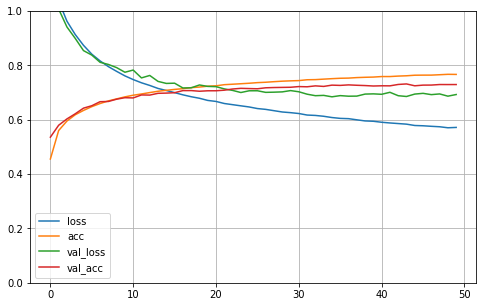

--- 647.4060301780701 seconds ---
End Time = 09:50:41


In [7]:
# deep learning on fft tranformed data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)

import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[512]))
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

print(model.summary())

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]) # sgd

filepath = 'D:/Dropbox/Machine Learning/Data/Ouyang/20200708/DeepNet_Model_labelDataOffset_fft.h5'
# model.load_weights(filepath) #load previously trained model


history = model.fit(X_fft_train, y_train, epochs=500, batch_size = 128,
                    validation_data=(X_fft_test, y_test),
                   callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='auto')
    ])

# we re-load the best weights once training is finished
model.load_weights(filepath)

import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# model.evaluate(X_fft_test, y_test)

print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Random Forest Model

In [10]:
# Random Forest on original data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting Random Forest Model')    
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)
print('start making prediction') 
y_test_pred_rf = rf_clf.predict(X_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
rf_accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Random Forest Model Accuracy: %.2f%%" % (rf_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:11:55
start fitting Random Forest Model
start making prediction
start calculating accuracy score
Random Forest Model Accuracy: 55.73%
--- 327.66197657585144 seconds ---
End Time = 22:17:23


Start Time = 21:50:43
start fitting Random Forest Model
start making prediction
Random Forest Model Accuracy: 65.26%
Balanced Accuracy Score: 63.78%
Recall Score: 63.78%
Precision Score: 65.41%
F1 Score: 64.36%
[[ 9617   261  1289    32  1623   750    21    11  1855    36]
 [  137  7442     2   458   188  1407  1335   361    57   734]
 [ 1812    12  5534     3   934    65     7     3   214     0]
 [    1   569     0  9361     7   271  5265  4483     0    46]
 [ 1840   234   979    53  6305   865    69    17   793    21]
 [  268  1108    19   183   571  8702   725    85    36   326]
 [    1   606     0  2869    18   335 21433  2597     2   230]
 [    0   323     0  2771     6   158  3187 19687     0   344]
 [ 2462   310   347     4   630   316    22     9  6915    76]
 [   83   814     1   177    45   669   487   882    65  5095]]
--- 3.867891550064087 seconds ---
End Time = 21:50:47


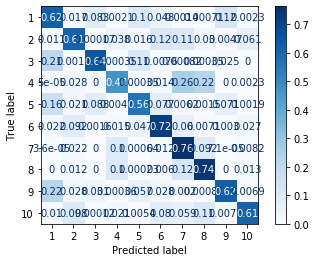

In [11]:
# Random Forest on fft transformed data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting Random Forest Model')    
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_fft_train, y_train)
print('start making prediction') 
y_test_pred_rf = rf_clf.predict(X_fft_test)

from sklearn.metrics import accuracy_score  
print("Random Forest Model Accuracy: %.2f%%" % (accuracy_score(y_test, y_test_pred_rf) * 100.0))

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_test_pred_rf)
print("Balanced Accuracy Score: %.2f%%" % (balanced_accuracy_score(y_test, y_test_pred_rf) * 100.0))

from sklearn.metrics import recall_score
print("Recall Score: %.2f%%" % (recall_score(y_test, y_test_pred_rf, average='macro') * 100.0))

from sklearn.metrics import precision_score
print("Precision Score: %.2f%%" % (precision_score(y_test, y_test_pred_rf, average='macro') * 100.0))

from sklearn.metrics import f1_score
print("F1 Score: %.2f%%" % (f1_score(y_test, y_test_pred_rf, average='macro') * 100.0))

# display confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred_rf))

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 
plot_confusion_matrix(rf_clf, X_fft_test, y_test, cmap=plt.cm.Blues, normalize='true')

print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")

Classification and Regression Trees (CART)

In [19]:
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting CART Model')    
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
print('start making prediction') 
y_test_pred_dt = dt_clf.predict(X_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
dt_accuracy = accuracy_score(y_test, y_test_pred_dt)
print("CART Model Accuracy: %.2f%%" % (dt_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:07:43
start fitting CART Model
start making prediction
start calculating accuracy score
CART Model Accuracy: 45.00%
--- 567.307021856308 seconds ---
End Time = 22:17:10


ModuleNotFoundError: No module named 'graphviz'

In [20]:
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting CART Model')    
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_fft_train, y_train)
print('start making prediction') 
y_test_pred_dt = dt_clf.predict(X_fft_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
dt_accuracy = accuracy_score(y_test, y_test_pred_dt)
print("CART Model Accuracy: %.2f%%" % (dt_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:38:23
start fitting CART Model
start making prediction
start calculating accuracy score
CART Model Accuracy: 53.73%
--- 397.2884895801544 seconds ---
End Time = 22:45:00


In [21]:
from sklearn.metrics import accuracy_score  
print("Random Forest Model Accuracy: %.2f%%" % (accuracy_score(y_test, y_test_pred_dt) * 100.0))

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_test_pred_rf)
print("Balanced Accuracy Score: %.2f%%" % (balanced_accuracy_score(y_test, y_test_pred_dt) * 100.0))

from sklearn.metrics import recall_score
print("Recall Score: %.2f%%" % (recall_score(y_test, y_test_pred_dt, average='macro') * 100.0))

from sklearn.metrics import precision_score
print("Precision Score: %.2f%%" % (precision_score(y_test, y_test_pred_dt, average='macro') * 100.0))

from sklearn.metrics import f1_score
print("F1 Score: %.2f%%" % (f1_score(y_test, y_test_pred_dt, average='macro') * 100.0))

# display confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred_dt))

Random Forest Model Accuracy: 53.73%
Balanced Accuracy Score: 52.75%
Recall Score: 52.75%
Precision Score: 52.81%
F1 Score: 52.78%
[[ 7869   361  1628    69  2081   650    57    45  2591   144]
 [  383  6068    47   786   371  1496  1079   606   307   978]
 [ 1677    51  4788    23  1254   120    17    17   611    26]
 [   63   717    22  8738    82   443  4908  4667    22   341]
 [ 2185   374  1166   100  5147   760   109    54  1138   143]
 [  713  1468   122   420   759  6520   704   309   305   703]
 [   53  1023    24  5149    91   722 16834  3668    47   480]
 [   42   598    12  4713    63   322  3600 16206    33   887]
 [ 2689   293   649    45  1090   329    35    43  5741   177]
 [  200   999    17   326   108   700   427   841   206  4494]]


KNN Model

In [13]:
# KNN on original data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting KNN Model')    
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs = -1) 
knn_clf.fit(X_train, y_train)
print('start making prediction') 
y_test_pred_knn = knn_clf.predict(X_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
knn_accuracy = accuracy_score(y_test, y_test_pred_knn)
print("KNN Model Accuracy: %.2f%%" % (knn_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:24:27
start fitting KNN Model
start making prediction
start calculating accuracy score
Random Forest Model Accuracy: 49.68%
--- 213.64235925674438 seconds ---
End Time = 22:28:01


In [14]:
# KNN on fft transformed data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting KNN Model')    
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs = -1) 
knn_clf.fit(X_fft_train, y_train)
print('start making prediction') 
y_test_pred_knn = knn_clf.predict(X_fft_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
knn_accuracy = accuracy_score(y_test, y_test_pred_knn)
print("KNN Model Accuracy: %.2f%%" % (knn_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:28:01
start fitting KNN Model
start making prediction
start calculating accuracy score
Random Forest Model Accuracy: 57.42%
--- 791.6415407657623 seconds ---
End Time = 22:41:13


Naive Bayes

In [15]:
# Naive Bayes
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting Gaussian Naive Bayes Model')    
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
print('start making prediction') 
y_test_pred_gnb = gnb_clf.predict(X_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
gnb_accuracy = accuracy_score(y_test, y_test_pred_gnb)
print("Random Forest Model Accuracy: %.2f%%" % (gnb_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:41:13
start fitting Gaussian Naive Bayes Model
start making prediction
start calculating accuracy score
Random Forest Model Accuracy: 15.85%
--- 13.600178956985474 seconds ---
End Time = 22:41:26


In [16]:
# Naive Bayes
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting Gaussian Naive Bayes Model')    
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_fft_train, y_train)
print('start making prediction') 
y_test_pred_gnb = gnb_clf.predict(X_fft_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
gnb_accuracy = accuracy_score(y_test, y_test_pred_gnb)
print("Random Forest Model Accuracy: %.2f%%" % (gnb_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:41:26
start fitting Gaussian Naive Bayes Model
start making prediction
start calculating accuracy score
Random Forest Model Accuracy: 16.61%
--- 13.446266412734985 seconds ---
End Time = 22:41:40


Logistic Regression

In [17]:
# Logistic Regression
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting Logistic Regression Model')    
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
print('start making prediction') 
y_test_pred_lr = lr_clf.predict(X_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
lr_accuracy = accuracy_score(y_test, y_test_pred_lr)
print("Logistic Regression Model Accuracy: %.2f%%" % (lr_accuracy * 100.0))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:42:26
start fitting Logistic Regression Model
start making prediction
start calculating accuracy score
Logistic Regression Model Accuracy: 17.79%
End Time = 22:43:13


C:\Users\jiahu_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
# Logistic Regression
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting Logistic Regression Model')    
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_fft_train, y_train)
print('start making prediction') 
y_test_pred_lr = lr_clf.predict(X_fft_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
lr_accuracy = accuracy_score(y_test, y_test_pred_lr)
print("Logistic Regression Model Accuracy: %.2f%%" % (lr_accuracy * 100.0))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:43:18
start fitting Logistic Regression Model
start making prediction
start calculating accuracy score
Logistic Regression Model Accuracy: 17.75%
End Time = 22:44:05


C:\Users\jiahu_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SGD Model

In [19]:
# SGD on original data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting SGD Model') 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
print('start making prediction') 
y_test_pred_sgd = sgd_clf.predict(X_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
sgd_accuracy = accuracy_score(y_test, y_test_pred_sgd)
print("SGD Model Accuracy: %.2f%%" % (sgd_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:45:16
start fitting SGD Model
start making prediction
start calculating accuracy score
SGD Model Accuracy: 17.17%
--- 157.50437116622925 seconds ---
End Time = 22:47:53


In [20]:
# SGD on Fourier Tranformed Data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting SGD Model') 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_fft_train, y_train)
print('start making prediction') 
y_test_pred_sgd = sgd_clf.predict(X_fft_test)
print('start calculating accuracy score') 
from sklearn.metrics import accuracy_score  
sgd_accuracy = accuracy_score(y_test, y_test_pred_sgd)
print("SGD Model Accuracy: %.2f%%" % (sgd_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:47:56
start fitting SGD Model
start making prediction
start calculating accuracy score
SGD Model Accuracy: 16.77%
--- 169.52827405929565 seconds ---
End Time = 22:50:46


Light GBM 

In [21]:
# Light GBM on original data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting Light GBM Model') 
import lightgbm as lgb
gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train)
print('start making prediction') 
y_test_pred_gbm = gbm.predict(X_test)
print('start calculating accuracy score') 
gbm_accuracy = accuracy_score(y_test, y_test_pred_gbm)
print("Light GBM Model Accuracy: %.2f%%" % (gbm_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:50:46
start running Light GBM Model
Light GBM Model Accuracy: 45.82%
--- 243.98843097686768 seconds ---
End Time = 22:54:50


In [22]:
# Light GBM on TTF data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting Light GBM Model') 
import lightgbm as lgb
gbm = lgb.LGBMClassifier()
gbm.fit(X_fft_train, y_train)
print('start making prediction') 
y_test_pred_gbm = gbm.predict(X_fft_test)
print('start calculating accuracy score') 
gbm_accuracy = accuracy_score(y_test, y_test_pred_gbm)
print("Light GBM Model Accuracy: %.2f%%" % (gbm_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:54:50
start fitting Light GBM Model
start making prediction
start calculating accuracy score
Light GBM Model Accuracy: 60.32%
--- 295.6681399345398 seconds ---
End Time = 22:59:45


XGBoost

In [23]:
# XGBoost
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting XGBoost Model') 
from xgboost import XGBClassifier
XGB_clf = XGBClassifier()
XGB_clf.fit(X_train, y_train)
print('start making prediction') 
y_test_pred_XGB = XGB_clf.predict(X_test)
print('start calculating accuracy score') 
XGB_accuracy = accuracy_score(y_test, y_test_pred_XGB)
print("XGBoost Model Accuracy: %.2f%%" % (XGB_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 22:59:45
start fitting Light GBM Model
start making prediction
start calculating accuracy score
XGBoost Model Accuracy: 51.00%
--- 6192.387484550476 seconds ---
End Time = 00:42:58


In [24]:
# XGBoost
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
print('start fitting XGBoost Model') 
from xgboost import XGBClassifier
XGB_clf = XGBClassifier()
XGB_clf.fit(X_fft_train, y_train)
print('start making prediction') 
y_test_pred_XGB = XGB_clf.predict(X_fft_test)
print('start calculating accuracy score') 
XGB_accuracy = accuracy_score(y_test, y_test_pred_XGB)
print("XGBoost Model Accuracy: %.2f%%" % (XGB_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 00:42:58
start fitting Light GBM Model
start making prediction
start calculating accuracy score
XGBoost Model Accuracy: 64.02%
--- 6214.950865507126 seconds ---
End Time = 02:26:33


CatBoost

In [25]:
# CatBoost on original data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
import time
start_time = time.time() 
print('start fitting CatBoost Model') 
from catboost import CatBoostClassifier
catb_clf = CatBoostClassifier()
catb_clf.fit(X_train, y_train, verbose=1)
print('start making prediction') 
y_test_pred_catb = catb_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('start calculating accuracy score') 
catb_accuracy = accuracy_score(y_test, y_test_pred_catb)
print("Cat Boost Model Accuracy: %.2f%%" % (catb_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 02:26:33
start fitting CatBoost Model
Learning rate set to 0.106043
0:	learn: 2.2226952	total: 5.36s	remaining: 1h 29m 10s
1:	learn: 2.1635928	total: 10s	remaining: 1h 23m 11s
2:	learn: 2.1140214	total: 14.6s	remaining: 1h 20m 47s
3:	learn: 2.0692515	total: 19.5s	remaining: 1h 20m 48s
4:	learn: 2.0192828	total: 24.4s	remaining: 1h 20m 58s
5:	learn: 1.9656698	total: 29.3s	remaining: 1h 21m
6:	learn: 1.9356997	total: 34.1s	remaining: 1h 20m 42s
7:	learn: 1.9113236	total: 38.9s	remaining: 1h 20m 26s
8:	learn: 1.8863056	total: 43.7s	remaining: 1h 20m 11s
9:	learn: 1.8471827	total: 48.6s	remaining: 1h 20m 12s
10:	learn: 1.8276087	total: 53.6s	remaining: 1h 20m 19s
11:	learn: 1.7965561	total: 58.3s	remaining: 1h 19m 58s
12:	learn: 1.7747214	total: 1m 3s	remaining: 1h 19m 43s
13:	learn: 1.7515820	total: 1m 8s	remaining: 1h 20m 8s
14:	learn: 1.7281660	total: 1m 13s	remaining: 1h 19m 54s
15:	learn: 1.7135890	total: 1m 17s	remaining: 1h 19m 25s
16:	learn: 1.6924892	total: 1m 22s	rem

144:	learn: 1.4098538	total: 11m 10s	remaining: 1h 5m 51s
145:	learn: 1.4076992	total: 11m 15s	remaining: 1h 5m 49s
146:	learn: 1.4073534	total: 11m 19s	remaining: 1h 5m 43s
147:	learn: 1.4059399	total: 11m 24s	remaining: 1h 5m 39s
148:	learn: 1.4055280	total: 11m 28s	remaining: 1h 5m 32s
149:	learn: 1.4051560	total: 11m 33s	remaining: 1h 5m 28s
150:	learn: 1.4048642	total: 11m 37s	remaining: 1h 5m 22s
151:	learn: 1.4045125	total: 11m 41s	remaining: 1h 5m 15s
152:	learn: 1.4031003	total: 11m 46s	remaining: 1h 5m 12s
153:	learn: 1.4018677	total: 11m 51s	remaining: 1h 5m 9s
154:	learn: 1.4016692	total: 11m 55s	remaining: 1h 5m 2s
155:	learn: 1.4012910	total: 12m	remaining: 1h 4m 56s
156:	learn: 1.4006836	total: 12m 4s	remaining: 1h 4m 52s
157:	learn: 1.4001870	total: 12m 9s	remaining: 1h 4m 47s
158:	learn: 1.3997289	total: 12m 13s	remaining: 1h 4m 41s
159:	learn: 1.3990417	total: 12m 18s	remaining: 1h 4m 36s
160:	learn: 1.3985701	total: 12m 22s	remaining: 1h 4m 31s
161:	learn: 1.3970402	

290:	learn: 1.3024986	total: 22m 25s	remaining: 54m 38s
291:	learn: 1.3016808	total: 22m 30s	remaining: 54m 34s
292:	learn: 1.3013598	total: 22m 35s	remaining: 54m 29s
293:	learn: 1.3004410	total: 22m 39s	remaining: 54m 25s
294:	learn: 1.3000537	total: 22m 44s	remaining: 54m 21s
295:	learn: 1.2993185	total: 22m 49s	remaining: 54m 17s
296:	learn: 1.2984362	total: 22m 54s	remaining: 54m 13s
297:	learn: 1.2974132	total: 22m 59s	remaining: 54m 9s
298:	learn: 1.2970587	total: 23m 3s	remaining: 54m 4s
299:	learn: 1.2969317	total: 23m 8s	remaining: 53m 59s
300:	learn: 1.2962824	total: 23m 12s	remaining: 53m 54s
301:	learn: 1.2956959	total: 23m 17s	remaining: 53m 51s
302:	learn: 1.2954471	total: 23m 22s	remaining: 53m 45s
303:	learn: 1.2950491	total: 23m 26s	remaining: 53m 40s
304:	learn: 1.2948613	total: 23m 31s	remaining: 53m 35s
305:	learn: 1.2946246	total: 23m 35s	remaining: 53m 30s
306:	learn: 1.2934582	total: 23m 40s	remaining: 53m 26s
307:	learn: 1.2928212	total: 23m 45s	remaining: 53m 

438:	learn: 1.2346450	total: 33m 56s	remaining: 43m 22s
439:	learn: 1.2344709	total: 34m	remaining: 43m 17s
440:	learn: 1.2342635	total: 34m 5s	remaining: 43m 12s
441:	learn: 1.2336166	total: 34m 10s	remaining: 43m 8s
442:	learn: 1.2331879	total: 34m 15s	remaining: 43m 4s
443:	learn: 1.2328991	total: 34m 19s	remaining: 42m 59s
444:	learn: 1.2324061	total: 34m 24s	remaining: 42m 54s
445:	learn: 1.2323052	total: 34m 28s	remaining: 42m 49s
446:	learn: 1.2320870	total: 34m 33s	remaining: 42m 45s
447:	learn: 1.2315964	total: 34m 38s	remaining: 42m 40s
448:	learn: 1.2312762	total: 34m 42s	remaining: 42m 35s
449:	learn: 1.2310911	total: 34m 47s	remaining: 42m 31s
450:	learn: 1.2308986	total: 34m 51s	remaining: 42m 26s
451:	learn: 1.2307167	total: 34m 55s	remaining: 42m 21s
452:	learn: 1.2305083	total: 35m	remaining: 42m 16s
453:	learn: 1.2302892	total: 35m 4s	remaining: 42m 11s
454:	learn: 1.2297399	total: 35m 9s	remaining: 42m 7s
455:	learn: 1.2296585	total: 35m 14s	remaining: 42m 2s
456:	le

586:	learn: 1.1895378	total: 45m 25s	remaining: 31m 57s
587:	learn: 1.1891804	total: 45m 29s	remaining: 31m 52s
588:	learn: 1.1890202	total: 45m 34s	remaining: 31m 47s
589:	learn: 1.1885747	total: 45m 39s	remaining: 31m 43s
590:	learn: 1.1884203	total: 45m 43s	remaining: 31m 38s
591:	learn: 1.1881264	total: 45m 48s	remaining: 31m 34s
592:	learn: 1.1879637	total: 45m 52s	remaining: 31m 29s
593:	learn: 1.1875651	total: 45m 58s	remaining: 31m 25s
594:	learn: 1.1871283	total: 46m 2s	remaining: 31m 20s
595:	learn: 1.1869598	total: 46m 7s	remaining: 31m 15s
596:	learn: 1.1866631	total: 46m 12s	remaining: 31m 11s
597:	learn: 1.1865038	total: 46m 16s	remaining: 31m 6s
598:	learn: 1.1863317	total: 46m 21s	remaining: 31m 1s
599:	learn: 1.1862226	total: 46m 25s	remaining: 30m 57s
600:	learn: 1.1860657	total: 46m 30s	remaining: 30m 52s
601:	learn: 1.1856752	total: 46m 35s	remaining: 30m 47s
602:	learn: 1.1854952	total: 46m 39s	remaining: 30m 43s
603:	learn: 1.1851648	total: 46m 44s	remaining: 30m 

734:	learn: 1.1533986	total: 56m 56s	remaining: 20m 31s
735:	learn: 1.1531948	total: 57m	remaining: 20m 27s
736:	learn: 1.1528239	total: 57m 5s	remaining: 20m 22s
737:	learn: 1.1527290	total: 57m 10s	remaining: 20m 17s
738:	learn: 1.1524627	total: 57m 15s	remaining: 20m 13s
739:	learn: 1.1521926	total: 57m 19s	remaining: 20m 8s
740:	learn: 1.1520825	total: 57m 24s	remaining: 20m 3s
741:	learn: 1.1517425	total: 57m 29s	remaining: 19m 59s
742:	learn: 1.1515098	total: 57m 34s	remaining: 19m 54s
743:	learn: 1.1511858	total: 57m 39s	remaining: 19m 50s
744:	learn: 1.1508387	total: 57m 43s	remaining: 19m 45s
745:	learn: 1.1506821	total: 57m 48s	remaining: 19m 40s
746:	learn: 1.1505554	total: 57m 52s	remaining: 19m 36s
747:	learn: 1.1504060	total: 57m 57s	remaining: 19m 31s
748:	learn: 1.1503091	total: 58m 1s	remaining: 19m 26s
749:	learn: 1.1502550	total: 58m 5s	remaining: 19m 21s
750:	learn: 1.1498184	total: 58m 11s	remaining: 19m 17s
751:	learn: 1.1496983	total: 58m 15s	remaining: 19m 12s
7

879:	learn: 1.1272641	total: 1h 8m 12s	remaining: 9m 18s
880:	learn: 1.1270407	total: 1h 8m 17s	remaining: 9m 13s
881:	learn: 1.1269078	total: 1h 8m 21s	remaining: 9m 8s
882:	learn: 1.1268327	total: 1h 8m 26s	remaining: 9m 4s
883:	learn: 1.1266108	total: 1h 8m 30s	remaining: 8m 59s
884:	learn: 1.1265209	total: 1h 8m 35s	remaining: 8m 54s
885:	learn: 1.1261573	total: 1h 8m 40s	remaining: 8m 50s
886:	learn: 1.1260000	total: 1h 8m 44s	remaining: 8m 45s
887:	learn: 1.1259732	total: 1h 8m 49s	remaining: 8m 40s
888:	learn: 1.1257962	total: 1h 8m 54s	remaining: 8m 36s
889:	learn: 1.1255501	total: 1h 8m 58s	remaining: 8m 31s
890:	learn: 1.1254641	total: 1h 9m 3s	remaining: 8m 26s
891:	learn: 1.1253733	total: 1h 9m 7s	remaining: 8m 22s
892:	learn: 1.1250642	total: 1h 9m 12s	remaining: 8m 17s
893:	learn: 1.1247625	total: 1h 9m 17s	remaining: 8m 12s
894:	learn: 1.1246643	total: 1h 9m 22s	remaining: 8m 8s
895:	learn: 1.1245747	total: 1h 9m 26s	remaining: 8m 3s
896:	learn: 1.1243381	total: 1h 9m 31

In [26]:
# CatBoost on FFT data
import time
start_time = time.time()   
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Start Time =", current_time)
import time
start_time = time.time() 
print('start fitting CatBoost Model') 
from catboost import CatBoostClassifier
catb_clf = CatBoostClassifier()
catb_clf.fit(X_fft_train, y_train, verbose=1)
print('start making prediction') 
y_test_pred_catb = catb_clf.predict(X_fft_test)
from sklearn.metrics import accuracy_score
print('start calculating accuracy score') 
catb_accuracy = accuracy_score(y_test, y_test_pred_catb)
print("Cat Boost Model Accuracy: %.2f%%" % (catb_accuracy * 100.0))
print("--- %s seconds ---" % (time.time() - start_time))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 03:44:46
start fitting CatBoost Model
Learning rate set to 0.106043
0:	learn: 2.1909824	total: 4.44s	remaining: 1h 13m 55s
1:	learn: 2.0950908	total: 8.86s	remaining: 1h 13m 41s
2:	learn: 2.0216738	total: 13.5s	remaining: 1h 14m 39s
3:	learn: 1.9626268	total: 18s	remaining: 1h 14m 39s
4:	learn: 1.9096572	total: 22.3s	remaining: 1h 13m 59s
5:	learn: 1.8604799	total: 26.8s	remaining: 1h 13m 54s
6:	learn: 1.8228597	total: 31.4s	remaining: 1h 14m 19s
7:	learn: 1.7916441	total: 35.8s	remaining: 1h 13m 53s
8:	learn: 1.7619312	total: 40s	remaining: 1h 13m 25s
9:	learn: 1.7349077	total: 44.4s	remaining: 1h 13m 15s
10:	learn: 1.7160288	total: 48.8s	remaining: 1h 13m 3s
11:	learn: 1.7000845	total: 53s	remaining: 1h 12m 39s
12:	learn: 1.6841629	total: 57.1s	remaining: 1h 12m 16s
13:	learn: 1.6689938	total: 1m 1s	remaining: 1h 12m 3s
14:	learn: 1.6445795	total: 1m 5s	remaining: 1h 12m 10s
15:	learn: 1.6317478	total: 1m 10s	remaining: 1h 11m 54s
16:	learn: 1.6161475	total: 1m 14s	remai

145:	learn: 1.1777520	total: 10m 41s	remaining: 1h 2m 34s
146:	learn: 1.1767248	total: 10m 46s	remaining: 1h 2m 29s
147:	learn: 1.1759828	total: 10m 50s	remaining: 1h 2m 26s
148:	learn: 1.1750078	total: 10m 55s	remaining: 1h 2m 22s
149:	learn: 1.1738262	total: 10m 59s	remaining: 1h 2m 16s
150:	learn: 1.1732733	total: 11m 3s	remaining: 1h 2m 10s
151:	learn: 1.1725637	total: 11m 7s	remaining: 1h 2m 4s
152:	learn: 1.1717506	total: 11m 12s	remaining: 1h 2m
153:	learn: 1.1688331	total: 11m 16s	remaining: 1h 1m 57s
154:	learn: 1.1665561	total: 11m 21s	remaining: 1h 1m 55s
155:	learn: 1.1658388	total: 11m 25s	remaining: 1h 1m 50s
156:	learn: 1.1643857	total: 11m 30s	remaining: 1h 1m 45s
157:	learn: 1.1631804	total: 11m 34s	remaining: 1h 1m 40s
158:	learn: 1.1627337	total: 11m 38s	remaining: 1h 1m 34s
159:	learn: 1.1599490	total: 11m 43s	remaining: 1h 1m 33s
160:	learn: 1.1575700	total: 11m 48s	remaining: 1h 1m 30s
161:	learn: 1.1553362	total: 11m 53s	remaining: 1h 1m 28s
162:	learn: 1.1548012

292:	learn: 1.0420294	total: 21m 34s	remaining: 52m 3s
293:	learn: 1.0416278	total: 21m 38s	remaining: 51m 58s
294:	learn: 1.0410132	total: 21m 43s	remaining: 51m 54s
295:	learn: 1.0407464	total: 21m 47s	remaining: 51m 49s
296:	learn: 1.0397857	total: 21m 52s	remaining: 51m 46s
297:	learn: 1.0392354	total: 21m 56s	remaining: 51m 41s
298:	learn: 1.0382753	total: 22m 1s	remaining: 51m 37s
299:	learn: 1.0377806	total: 22m 5s	remaining: 51m 33s
300:	learn: 1.0375778	total: 22m 9s	remaining: 51m 28s
301:	learn: 1.0373067	total: 22m 14s	remaining: 51m 23s
302:	learn: 1.0366917	total: 22m 18s	remaining: 51m 18s
303:	learn: 1.0359920	total: 22m 23s	remaining: 51m 15s
304:	learn: 1.0356790	total: 22m 27s	remaining: 51m 9s
305:	learn: 1.0353811	total: 22m 31s	remaining: 51m 4s
306:	learn: 1.0349340	total: 22m 35s	remaining: 50m 59s
307:	learn: 1.0340878	total: 22m 40s	remaining: 50m 56s
308:	learn: 1.0338219	total: 22m 44s	remaining: 50m 51s
309:	learn: 1.0332685	total: 22m 48s	remaining: 50m 46

440:	learn: 0.9749133	total: 32m 30s	remaining: 41m 12s
441:	learn: 0.9746333	total: 32m 34s	remaining: 41m 7s
442:	learn: 0.9742475	total: 32m 39s	remaining: 41m 3s
443:	learn: 0.9739647	total: 32m 43s	remaining: 40m 59s
444:	learn: 0.9736361	total: 32m 48s	remaining: 40m 54s
445:	learn: 0.9732223	total: 32m 52s	remaining: 40m 50s
446:	learn: 0.9729157	total: 32m 57s	remaining: 40m 46s
447:	learn: 0.9727501	total: 33m 1s	remaining: 40m 41s
448:	learn: 0.9724047	total: 33m 6s	remaining: 40m 37s
449:	learn: 0.9721689	total: 33m 10s	remaining: 40m 32s
450:	learn: 0.9719311	total: 33m 14s	remaining: 40m 27s
451:	learn: 0.9716832	total: 33m 19s	remaining: 40m 23s
452:	learn: 0.9709622	total: 33m 23s	remaining: 40m 19s
453:	learn: 0.9707266	total: 33m 27s	remaining: 40m 14s
454:	learn: 0.9704449	total: 33m 32s	remaining: 40m 10s
455:	learn: 0.9703222	total: 33m 36s	remaining: 40m 5s
456:	learn: 0.9696409	total: 33m 41s	remaining: 40m 1s
457:	learn: 0.9693282	total: 33m 45s	remaining: 39m 57

588:	learn: 0.9310565	total: 43m 30s	remaining: 30m 21s
589:	learn: 0.9308983	total: 43m 34s	remaining: 30m 17s
590:	learn: 0.9303625	total: 43m 39s	remaining: 30m 12s
591:	learn: 0.9299677	total: 43m 44s	remaining: 30m 8s
592:	learn: 0.9295146	total: 43m 48s	remaining: 30m 4s
593:	learn: 0.9293661	total: 43m 53s	remaining: 29m 59s
594:	learn: 0.9289780	total: 43m 57s	remaining: 29m 55s
595:	learn: 0.9287726	total: 44m 2s	remaining: 29m 51s
596:	learn: 0.9286638	total: 44m 6s	remaining: 29m 46s
597:	learn: 0.9284702	total: 44m 10s	remaining: 29m 41s
598:	learn: 0.9281725	total: 44m 15s	remaining: 29m 37s
599:	learn: 0.9278996	total: 44m 20s	remaining: 29m 33s
600:	learn: 0.9276149	total: 44m 24s	remaining: 29m 28s
601:	learn: 0.9273669	total: 44m 29s	remaining: 29m 24s
602:	learn: 0.9272848	total: 44m 33s	remaining: 29m 20s
603:	learn: 0.9268954	total: 44m 37s	remaining: 29m 15s
604:	learn: 0.9264659	total: 44m 42s	remaining: 29m 11s
605:	learn: 0.9261461	total: 44m 47s	remaining: 29m 

736:	learn: 0.8961152	total: 54m 34s	remaining: 19m 28s
737:	learn: 0.8959604	total: 54m 38s	remaining: 19m 24s
738:	learn: 0.8958974	total: 54m 42s	remaining: 19m 19s
739:	learn: 0.8958472	total: 54m 47s	remaining: 19m 14s
740:	learn: 0.8957877	total: 54m 51s	remaining: 19m 10s
741:	learn: 0.8954021	total: 54m 56s	remaining: 19m 6s
742:	learn: 0.8951419	total: 55m 1s	remaining: 19m 1s
743:	learn: 0.8949671	total: 55m 5s	remaining: 18m 57s
744:	learn: 0.8948972	total: 55m 10s	remaining: 18m 52s
745:	learn: 0.8948141	total: 55m 14s	remaining: 18m 48s
746:	learn: 0.8945641	total: 55m 18s	remaining: 18m 44s
747:	learn: 0.8943818	total: 55m 23s	remaining: 18m 39s
748:	learn: 0.8942429	total: 55m 27s	remaining: 18m 35s
749:	learn: 0.8939852	total: 55m 32s	remaining: 18m 30s
750:	learn: 0.8936668	total: 55m 37s	remaining: 18m 26s
751:	learn: 0.8934493	total: 55m 42s	remaining: 18m 22s
752:	learn: 0.8933450	total: 55m 46s	remaining: 18m 17s
753:	learn: 0.8930872	total: 55m 50s	remaining: 18m 

883:	learn: 0.8700726	total: 1h 5m 32s	remaining: 8m 36s
884:	learn: 0.8698739	total: 1h 5m 37s	remaining: 8m 31s
885:	learn: 0.8695352	total: 1h 5m 41s	remaining: 8m 27s
886:	learn: 0.8693318	total: 1h 5m 46s	remaining: 8m 22s
887:	learn: 0.8690746	total: 1h 5m 51s	remaining: 8m 18s
888:	learn: 0.8689411	total: 1h 5m 55s	remaining: 8m 13s
889:	learn: 0.8688097	total: 1h 6m	remaining: 8m 9s
890:	learn: 0.8687544	total: 1h 6m 4s	remaining: 8m 4s
891:	learn: 0.8685615	total: 1h 6m 8s	remaining: 8m
892:	learn: 0.8684646	total: 1h 6m 13s	remaining: 7m 56s
893:	learn: 0.8683022	total: 1h 6m 17s	remaining: 7m 51s
894:	learn: 0.8681687	total: 1h 6m 22s	remaining: 7m 47s
895:	learn: 0.8679284	total: 1h 6m 26s	remaining: 7m 42s
896:	learn: 0.8678231	total: 1h 6m 30s	remaining: 7m 38s
897:	learn: 0.8676174	total: 1h 6m 35s	remaining: 7m 33s
898:	learn: 0.8674862	total: 1h 6m 40s	remaining: 7m 29s
899:	learn: 0.8673672	total: 1h 6m 44s	remaining: 7m 24s
900:	learn: 0.8672581	total: 1h 6m 48s	rema